In [1]:
import trainer
import torch
import random
import numpy as np
import os

from dataset import SeismogramDataset
from neural_networks.fc import FC

In [2]:
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
ROOT_DIR = os.path.join(os.getcwd())

In [4]:
dataset_path = os.path.join(ROOT_DIR, '..', 'datasets', 'heterogeneity')
train_dataset = SeismogramDataset(dataset_path)

In [5]:
from utils import number_of_parameters

model = FC(1, 64)
number_of_parameters(model)

Total number of parameters: 790592
Trainable number of parameters: 790592


In [6]:
model

FC(
  (adapter): Sequential(
    (adaptive_pool): AdaptiveAvgPool2d(output_size=(64, 64))
  )
  (fc_stack): Sequential(
    (linear_1): Linear(in_features=8192, out_features=64, bias=True)
    (act_1): Tanh()
  )
  (output): Linear(in_features=64, out_features=4096, bias=True)
)

In [7]:
from trainer import BaseTrainer

solver_config = os.path.join(dataset_path, 'solver_config.yaml')

# TODO: test with nonempty logger
t = BaseTrainer(model,
                device,
                train_dataset,
                solver_config,
                optimizer_type=torch.optim.Adam,
                optimizer_params={'lr': 1e-2},
                snapshot_interval=10)

Found /home/fenics/shared/pipeline/snapshots as a non-empty directory with 4 files


Running training procedure:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

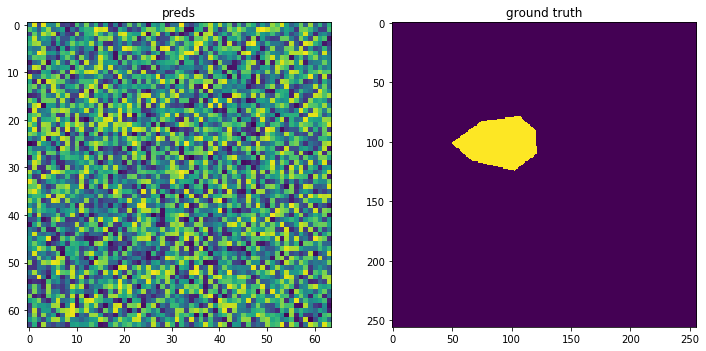

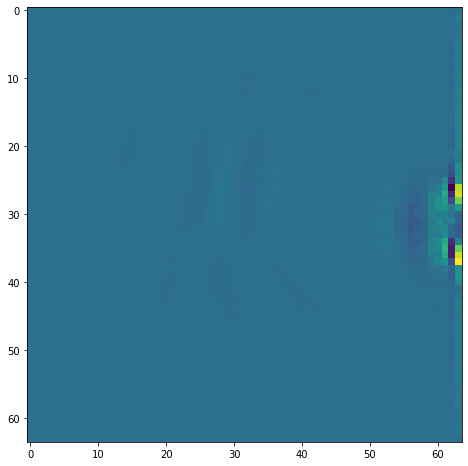

epoch: 0; loss: 0.0016753194900254356


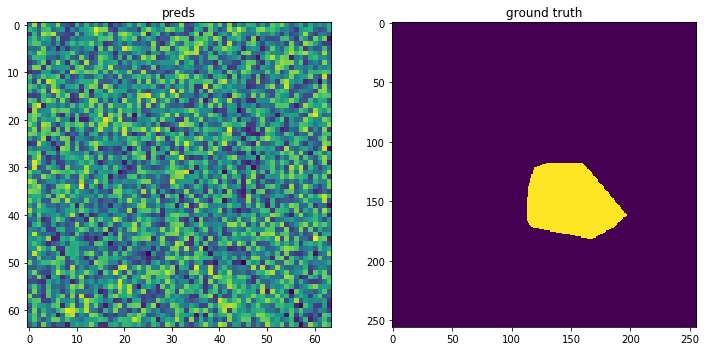

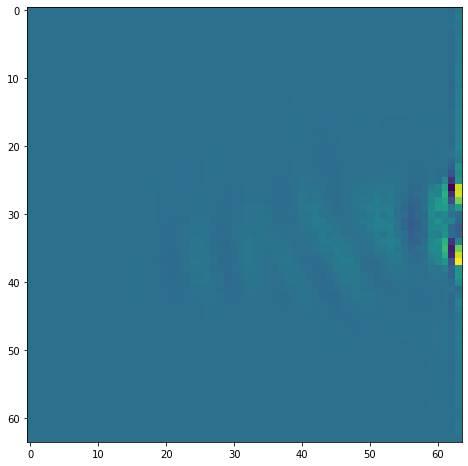

epoch: 0; loss: 0.001828517852237862


Epoch 2 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

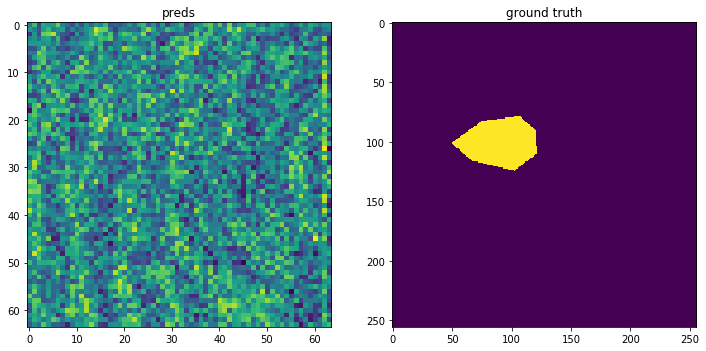

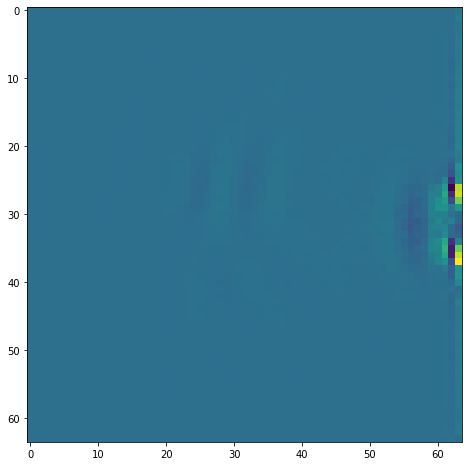

epoch: 1; loss: 0.0016724820799605645


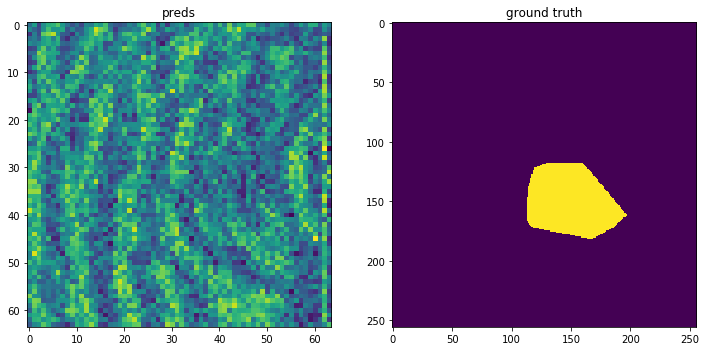

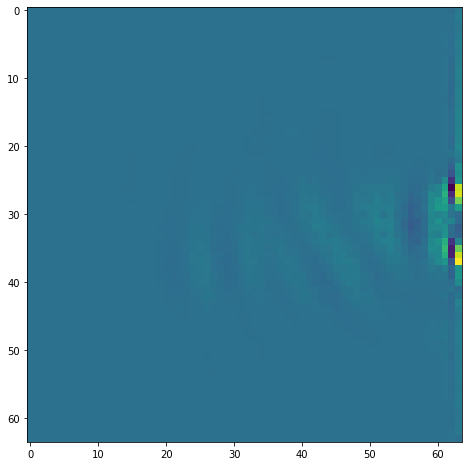

epoch: 1; loss: 0.0018175061837635857


Epoch 3 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

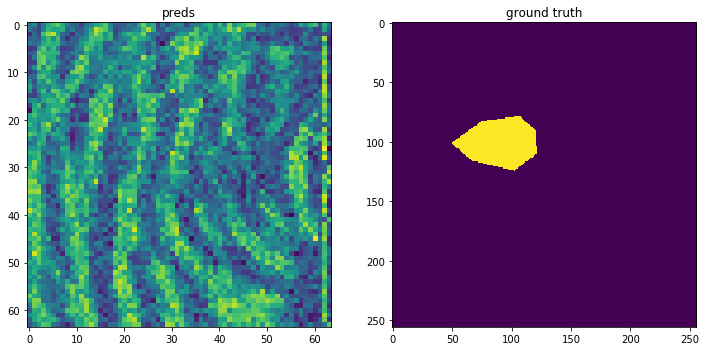

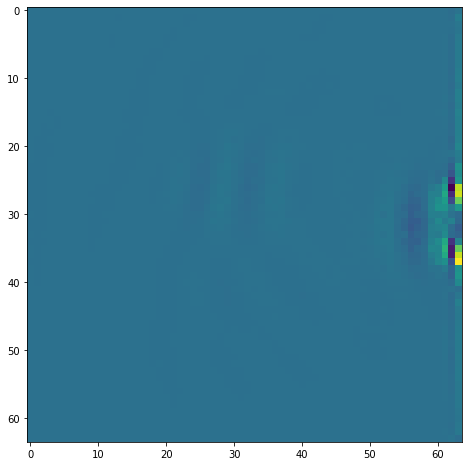

epoch: 2; loss: 0.00166340172926972


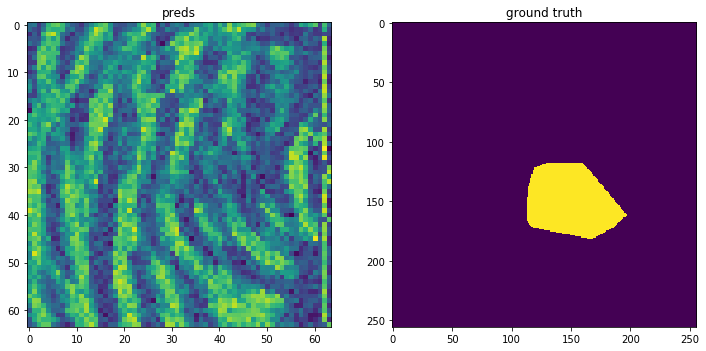

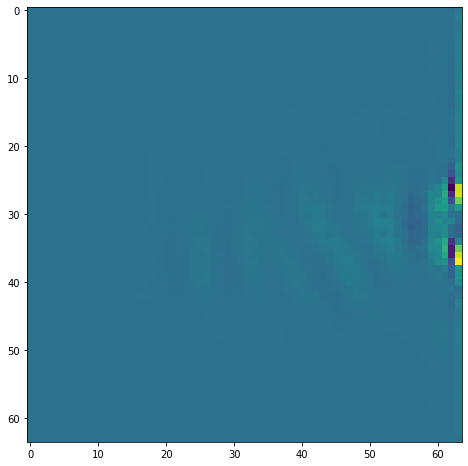

epoch: 2; loss: 0.001795923226762876


Epoch 4 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

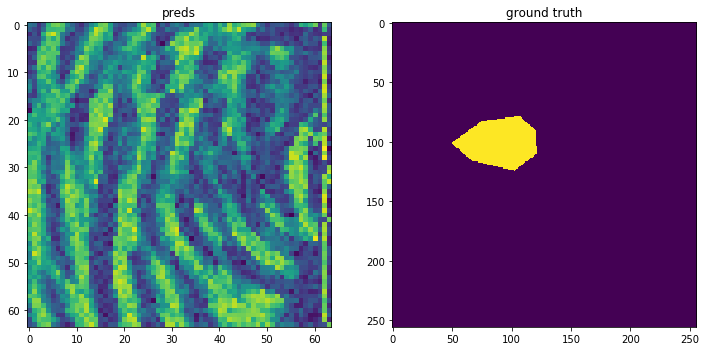

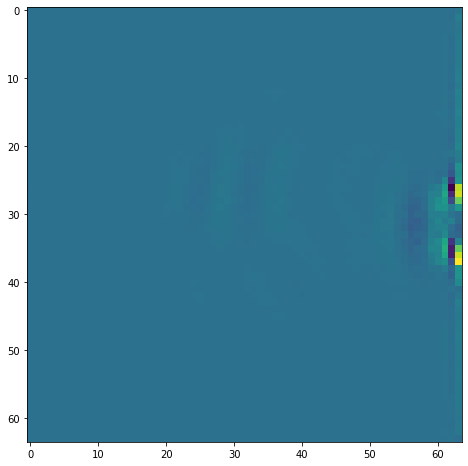

epoch: 3; loss: 0.0016498799048421508


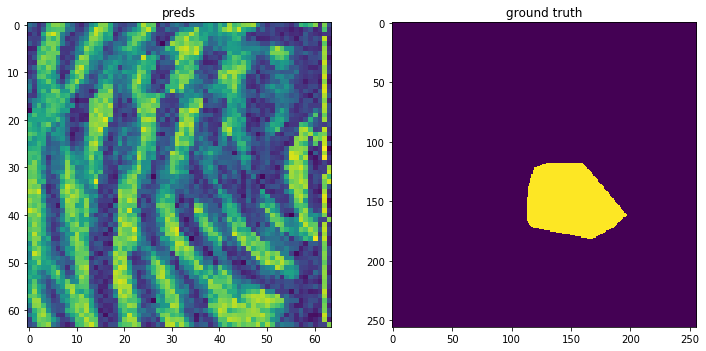

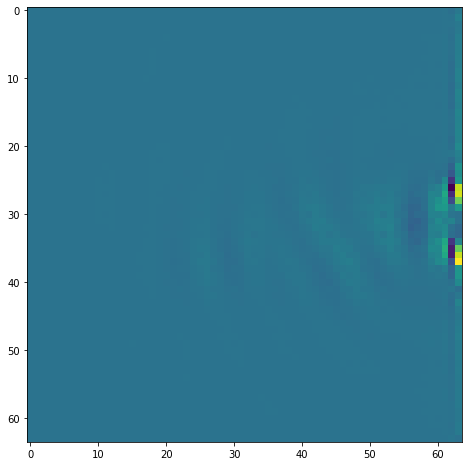

epoch: 3; loss: 0.0017650746724854713


Epoch 5 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

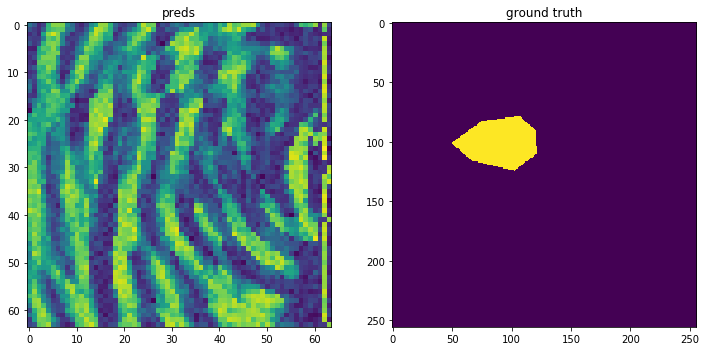

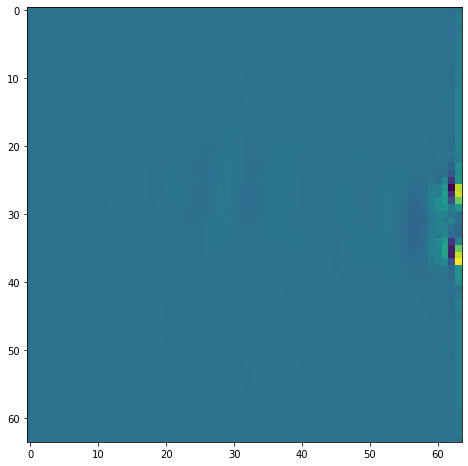

epoch: 4; loss: 0.0016333064483520056


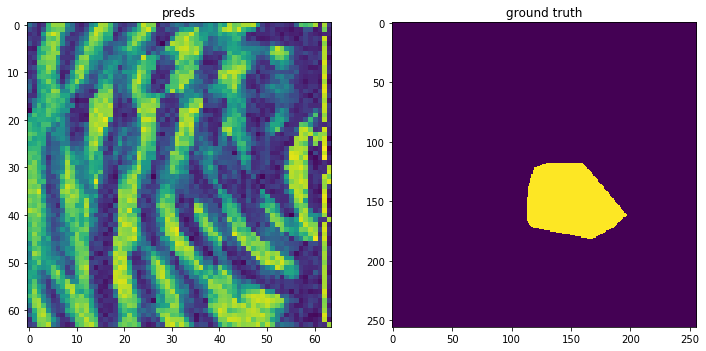

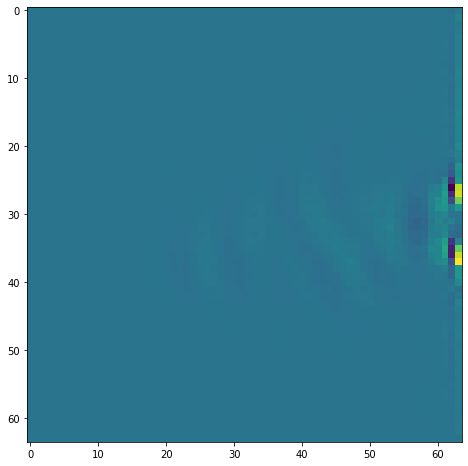

epoch: 4; loss: 0.0017312833573966645


Epoch 6 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

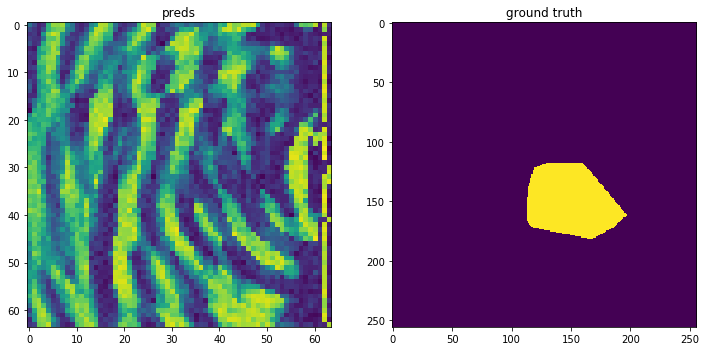

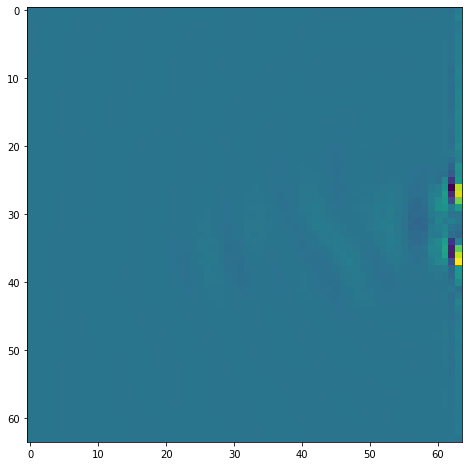

epoch: 5; loss: 0.0017145510542777645


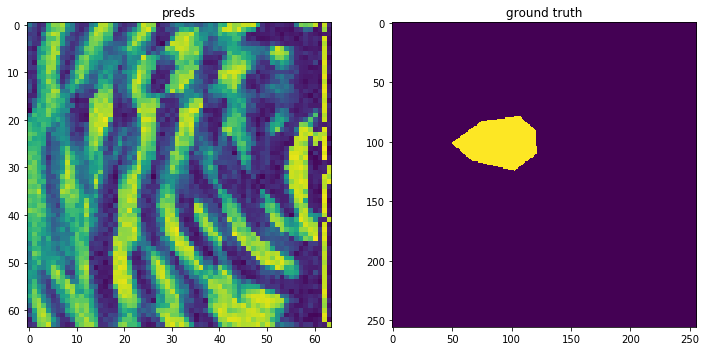

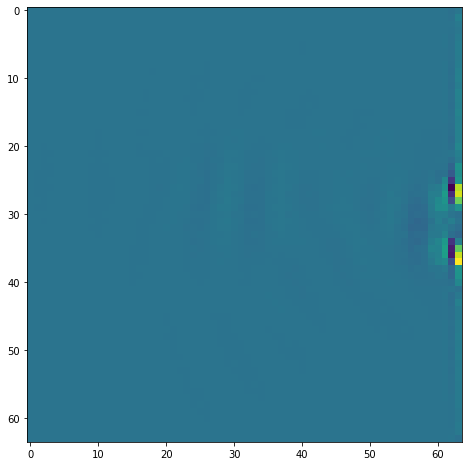

epoch: 5; loss: 0.0016131380995262818


Epoch 7 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

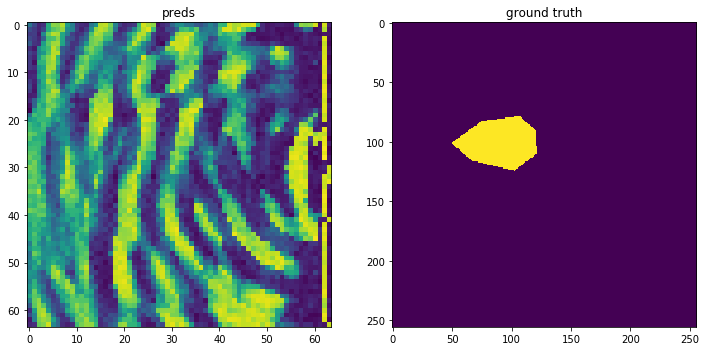

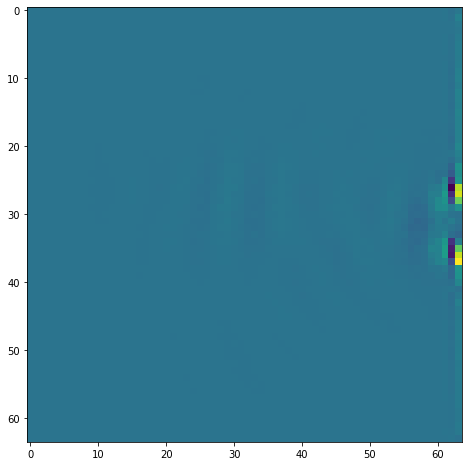

epoch: 6; loss: 0.0016079867850357194


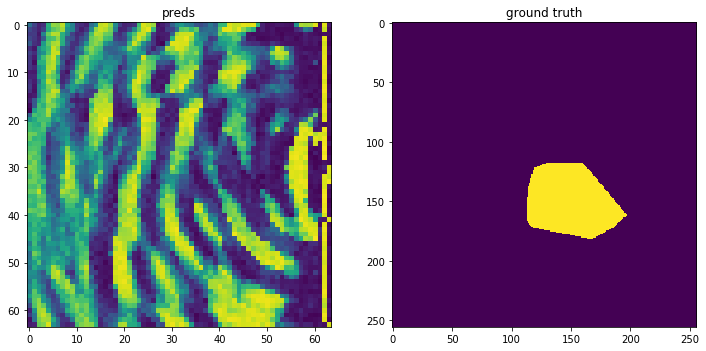

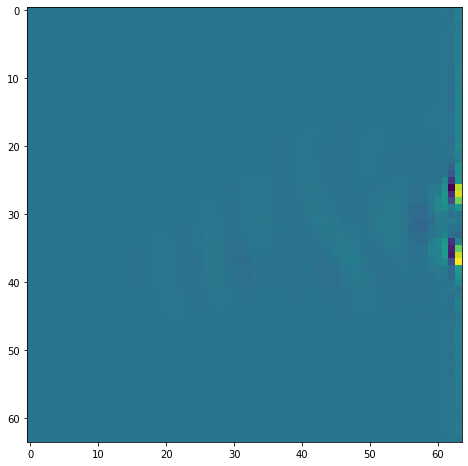

epoch: 6; loss: 0.0016779064735115068


Epoch 8 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

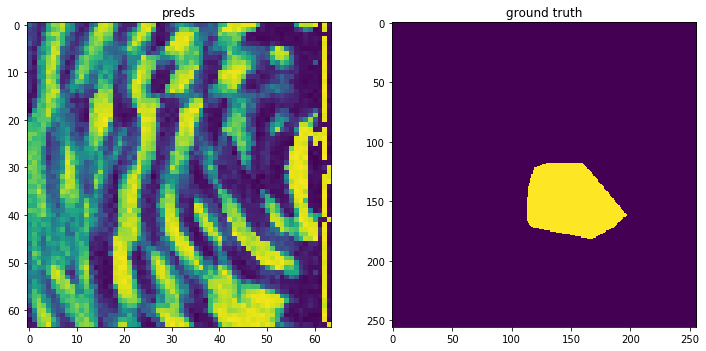

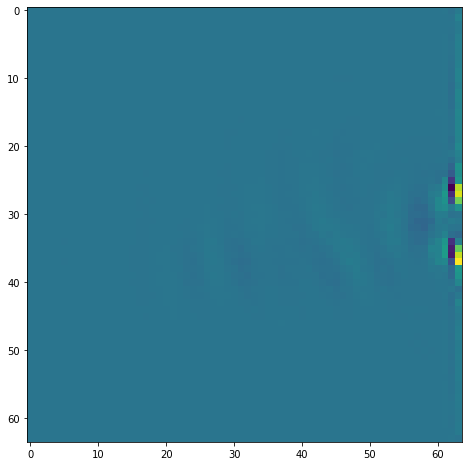

epoch: 7; loss: 0.0016686134034964452


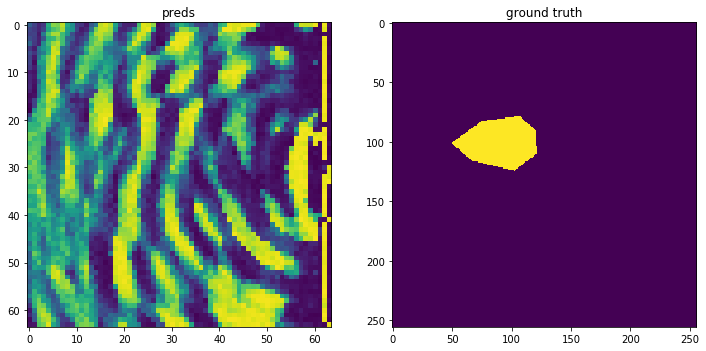

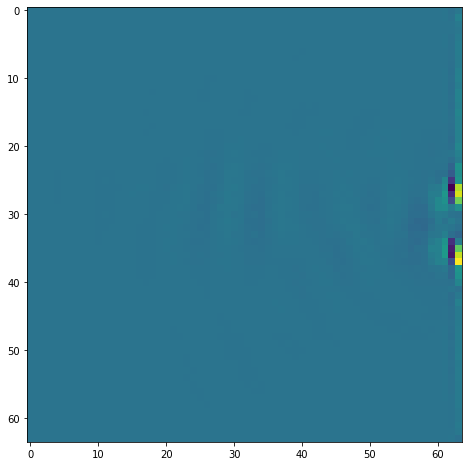

epoch: 7; loss: 0.0015977350645998381


Epoch 9 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

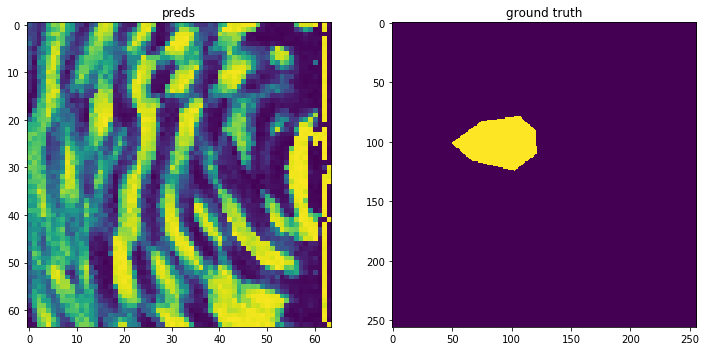

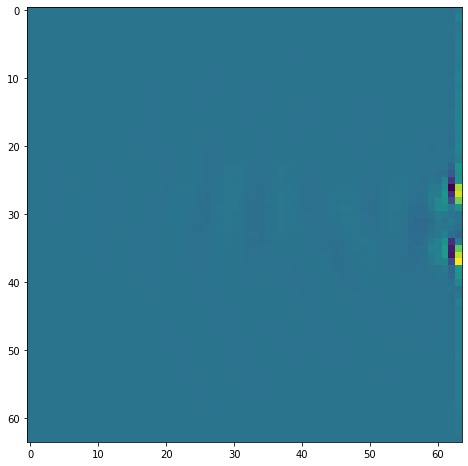

epoch: 8; loss: 0.0015950980001513827


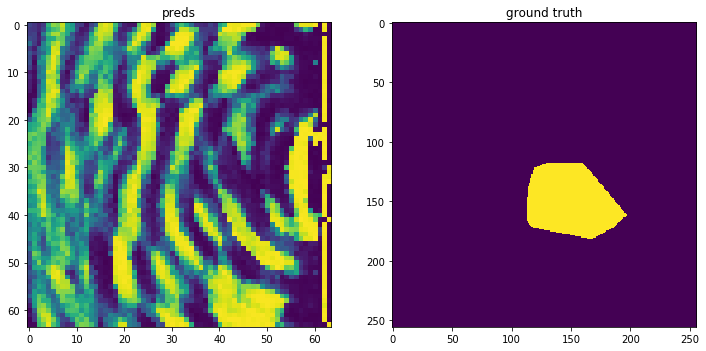

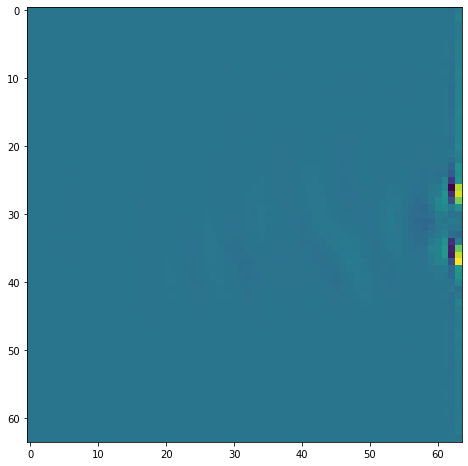

epoch: 8; loss: 0.001646014631913105


Epoch 10 of 100:   0%|          | 0/2 [00:00<?, ?it/s]

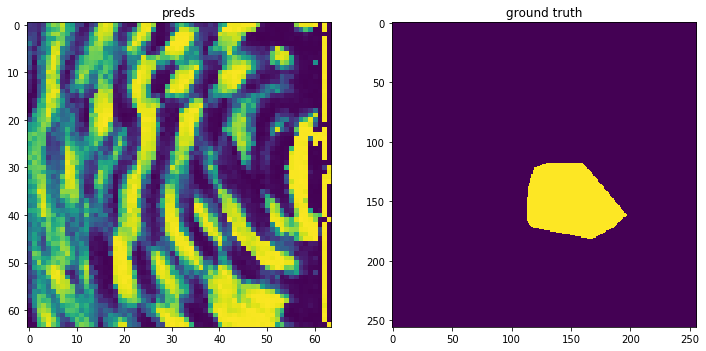

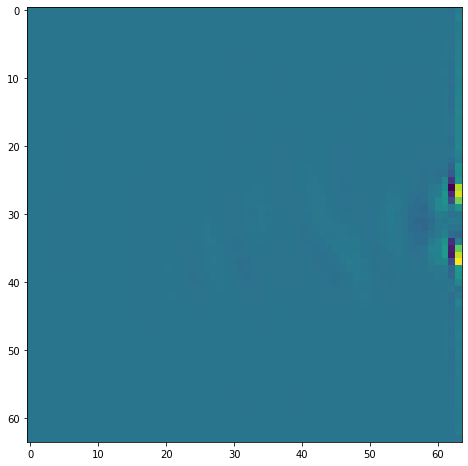

epoch: 9; loss: 0.001639938513461065


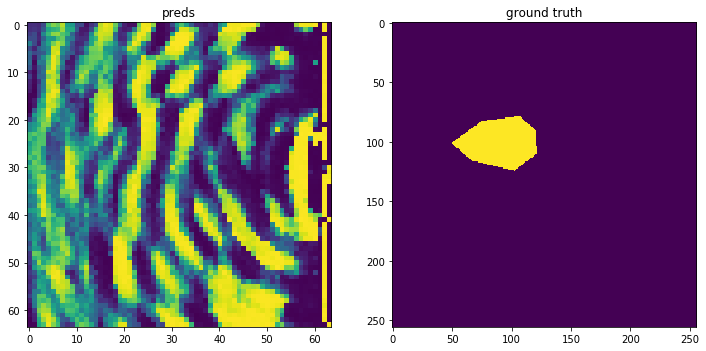

In [ ]:
#TODO: test if everything is allright with batch_size > 1
t.train(batch_size=1, epochs=100, num_solver_type='dolfin_adjoint')

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset[0]['seismogram'][1])

In [ ]:
plt.imshow(train_dataset[1]['seismogram'][1])